In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import models,layers 
import matplotlib.pyplot as Plt 

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
    
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

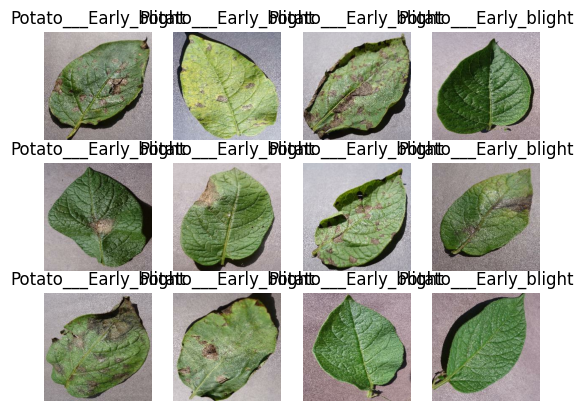

In [7]:
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = Plt.subplot(3,4,i+1)
        Plt.imshow(image_batch[i].numpy().astype("uint8"))
        Plt.title(class_names[label_batch[0]])
        Plt.axis('off')

In [8]:
train_size = 0.8 
len(dataset)*train_size

54.400000000000006

In [9]:
train_ds = dataset.take(54)
len(train_ds)

54

In [10]:
test_ds = dataset.skip(54)
val_ds = dataset.take(6)

In [11]:
def get_dataset_partitions_tf(dataset,train_split=0.8,test_split=0.1,val_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(dataset)
    
    if shuffle:
        dataset = dataset.shuffle(shuffle_size,seed=12)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = dataset.take(train_size)
    
    val_ds = dataset.skip(train_size).take(val_size)
    
    test_ds = dataset.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds 

In [12]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [13]:


train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)


In [15]:
from tensorflow.keras import layers

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])


In [16]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip('horizontal_and_vertical'),
  layers.RandomRotation(0.2),
])

In [20]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(32,(3,3),activation='relu',input_shape = input_shape),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
  layers.MaxPooling2D((2,2)),  
  layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
  layers.MaxPooling2D((2,2)),
  
  layers.Flatten(),
  layers.Dense(64,activation='relu'),
  layers.Dense(n_classes,activation='softmax'),

])

model.build(input_shape=input_shape)

C:\Users\nextt\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(
  optimizer = 'adam',
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics = ['accuracy']
)

In [23]:
history = model.fit(
  train_ds,
  epochs = EPOCHS,
  batch_size = BATCH_SIZE,
  verbose = 1,
  validation_data = val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.4443 - loss: 0.9539 - val_accuracy: 0.5469 - val_loss: 0.7611
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - accuracy: 0.5943 - loss: 0.8266 - val_accuracy: 0.7135 - val_loss: 0.6199
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - accuracy: 0.7402 - loss: 0.5800 - val_accuracy: 0.7708 - val_loss: 0.4923
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - accuracy: 0.7987 - loss: 0.4632 - val_accuracy: 0.8542 - val_loss: 0.2709
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - accuracy: 0.8445 - loss: 0.4272 - val_accuracy: 0.8958 - val_loss: 0.2747
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - accuracy: 0.9017 - loss: 0.2522 - val_accuracy: 0.8802 - val_loss: 0.2439
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - accuracy: 0.9377 - loss: 0.1600 - val_accuracy: 0.9531 - val_loss: 0.1378
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - accuracy: 0.9444 - loss: 0.1342 - val_accuracy: 0

In [25]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9736 - loss: 0.0520


In [26]:
history

In [27]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss  = history.history['val_loss']

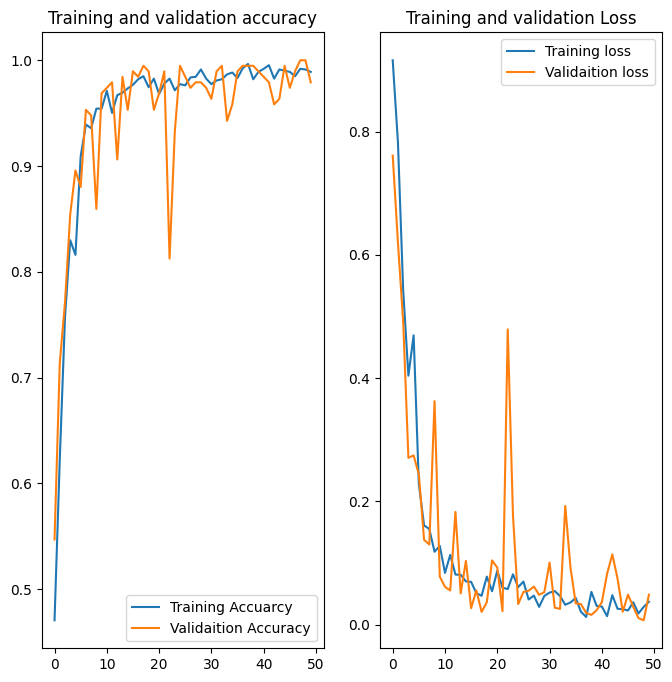

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuarcy')
plt.plot(range(EPOCHS),val_acc,label = 'Validaition Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and validation accuracy')




plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.plot(range(EPOCHS),val_loss,label = 'Validaition loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation Loss')

plt.show()


first image to predict 
first image actual label :  Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
predicted label :  Potato___Early_blight


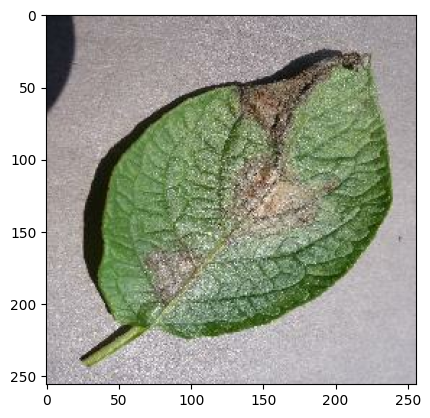

In [56]:
import numpy as np
for images_bacth , labels_bacth in test_ds.take(1):
  first_image = images_bacth[0].numpy().astype('uint8')
  first_label = labels_bacth[0].numpy()
  
  print('first image to predict ')
  plt.imshow(first_image)
  print('first image actual label : ',class_names[first_label])
  
  batch_prediction = model.predict(images_bacth)
  print("predicted label : ",class_names[np.argmax(batch_prediction[0])])
  
  

In [61]:
def predict(model,img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array,0) #  Create a batch
  
  predictions = model.predict(img_array)
  
  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])),2)
  return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


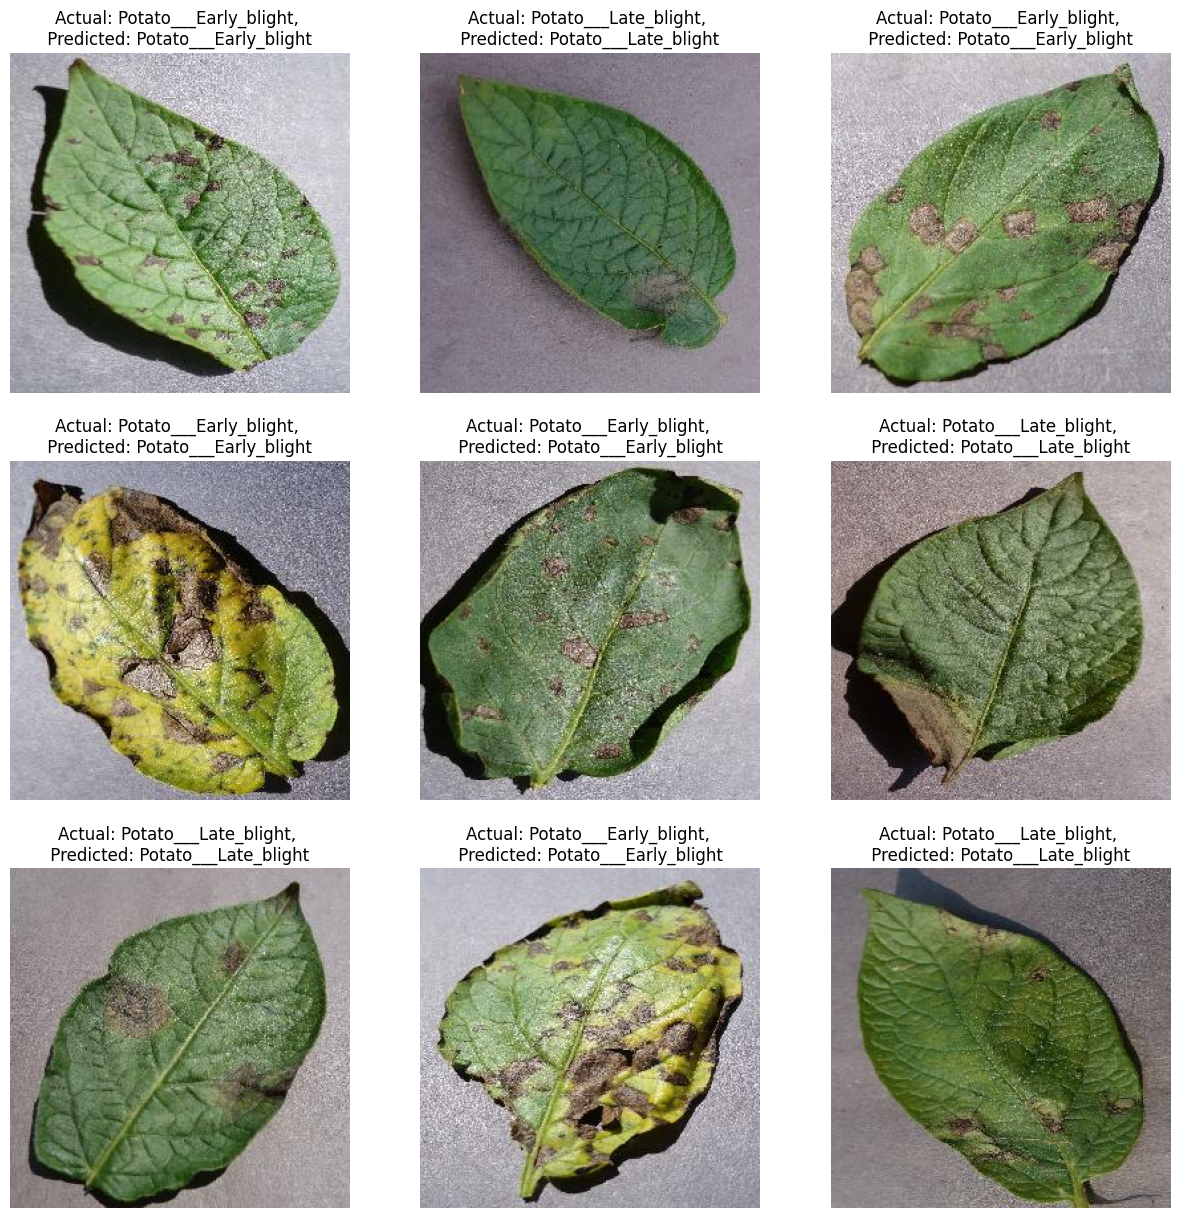

In [63]:
plt.figure(figsize = (15,15))
for images , labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    
    plt.imshow(images[i].numpy().astype("uint8"))
    
    predicted_class,confidence = predict(model,images[i].numpy())
    actual_class = class_names[labels[i]]
    
    plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class} ")
    
    
    plt.axis("off")

In [74]:
import os

# Create the directory if it doesn't exist
model_dir = "models"
os.makedirs(model_dir, exist_ok=True)

# Save the model
model.save(os.path.join(model_dir, 'model_v1.keras'))  # Use .keras or .h5
